## Dependencies

In [1]:
import numpy as np                                       # To perform numerical operations
import pandas as pd                                      # For data preprocessing
import matplotlib.pyplot as plt                          # For data visualization
import seaborn as sns                                    # For data visualization
from sklearn.model_selection import train_test_split     # To seperate label and features
from sklearn.ensemble import RandomForestRegressor       # Model
from sklearn import metrics                              # For model evaluation

## Data Preprocessing

In [2]:
# Loading the dataset

gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# Printing first 5 rows of the dataframe

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Printing last five rows of the dataframe

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Printing information of the dataframe

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Printing statistics of the dataframe

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# Checking null values present or not in dataframe

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Printing the shape of the dataframe

gold_data.shape

(2290, 6)

Correlation:

- Positive Correlation
- Negative Correlation



In [9]:
correlation = gold_data.corr()

C:\Users\sandi\AppData\Local\Temp\ipykernel_10280\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

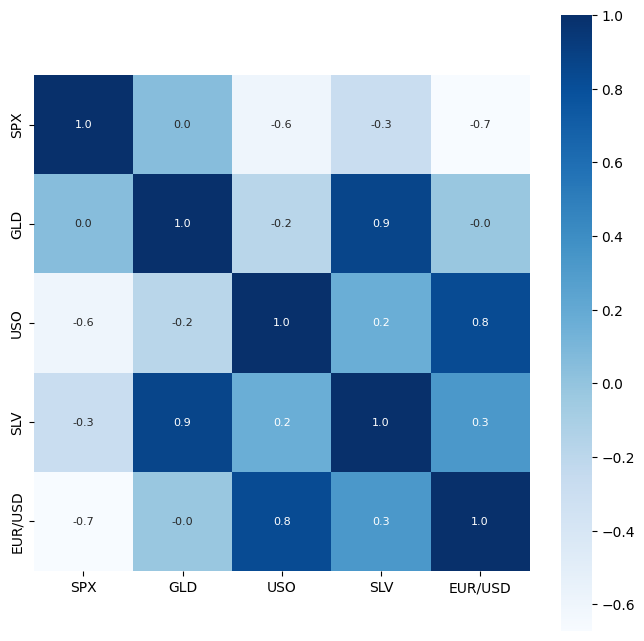

In [12]:
# Plotting a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
# printing correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sandi\AppData\Local\Temp\ipykernel_10280\445682083.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

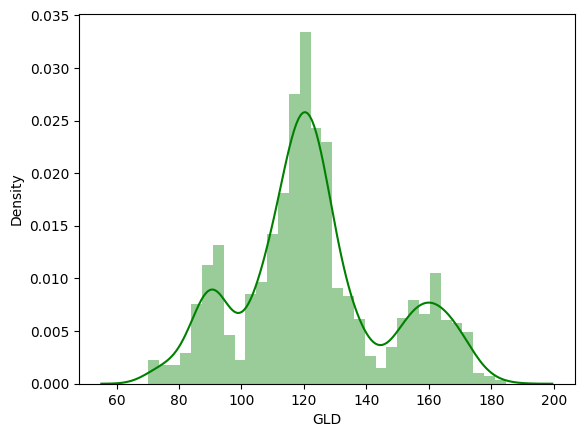

In [14]:
# Plotting the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

## Train-Test Split

In [15]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

## Model Training

### Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model Evaluation

In [20]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[122.52609972 130.65690354 127.77650008  96.38429721 118.97740044
 114.50459943 124.83200117 117.66519914 108.0867013   98.15349956
  95.30119926 167.89919833 148.84480104 116.55170037 170.78110174
  85.1965995  123.42379871 109.23679694 113.17470068 131.54700279
 124.28839889 113.84700122 115.59640055 108.63049953 108.51800149
 125.80929988 118.6154999  112.45409895 113.1119012  125.32189933
 146.08680209  89.60439963 167.69339955 113.59519927 108.44500123
 120.34710118 142.03879807 161.22540172 174.05119808 153.08550172
 119.30480141 113.37440047 121.34389921 113.83549931 121.8808999
 108.00490088  88.1545987  114.48439925 129.84350259 117.77880114
 104.24929955 129.95340249 107.14799822 160.12140315 131.77310004
 118.16589964 147.15860001 135.25730248  95.70670099 124.50000147
 115.03189839  86.12410078 104.27669947 113.67280053  84.28989939
 122.22490005 116.57269928 113.72790208 164.32770365  92.32950028
  80.38690103 161.10240073 158.99590143 106.63490003 147.36270186
 109.494097

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898425439137685


##### Compare the Actual Values and Predicted Values in a Plot

In [23]:
Y_test = list(Y_test)

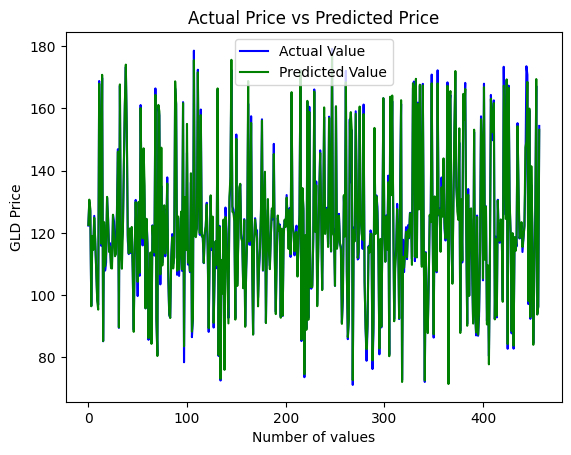

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Save Model

In [25]:
import pickle

In [26]:
rf_regressor = 'RandomForest_Regressor.pkl'
with open(rf_regressor,'wb') as file:
    pickle.dump(regressor,file)